Markdown cells that start with the symbol ?? are ideas I would like to check if true.

In [8]:
file_name = "C:\projects\nathan"

In [9]:
file_name

'C:\\projects\nathan'

In [10]:
print(file_name)

C:\projects
athan


In [7]:
import pandas as pd
import numpy as np
from datetime import datetime
from math import radians, sin, cos, sqrt, atan2
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import math
from matplotlib.gridspec import GridSpec
from statsmodels.graphics.gofplots import qqplot

In [5]:
df = pd.read_csv("nyc_taxi_trip_duration.csv")

In [3]:
df.shape

(729322, 11)

In [4]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [8]:
df["pickup_longitude"].dtypes

dtype('float64')

In [9]:
df_test=df["pickup_longitude"]

In [ ]:
pd.get_dummies(df_test)

In [5]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [6]:
# delete the "id" column since it is useless.
df.drop(columns = "id", inplace=True)

In [7]:
# Add trip duration in minutes (easier to understand than in seconds).
df["trip_duration_in_minutes"] = round(df["trip_duration"]/60.0,0)

In [8]:
# check the data types in each column
df.dtypes

vendor_id                     int64
pickup_datetime              object
dropoff_datetime             object
passenger_count               int64
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
store_and_fwd_flag           object
trip_duration                 int64
trip_duration_in_minutes    float64
dtype: object

In [9]:
df["passenger_count"].value_counts()

passenger_count
1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: count, dtype: int64

In [10]:
# Here I find it remarkable that there are 33 rows where passenger_count is 0. 
df[df["passenger_count"]==0]["trip_duration"].value_counts()

trip_duration
4       3
3       2
8       2
7       2
22      2
9       2
29      1
41      1
1       1
45      1
385     1
12      1
19      1
1029    1
981     1
2251    1
1556    1
78      1
3243    1
105     1
2191    1
1121    1
48      1
13      1
5       1
68      1
Name: count, dtype: int64

In [11]:
df[df["passenger_count"]==0]["trip_duration_in_minutes"].value_counts()

trip_duration_in_minutes
0.0     19
1.0      5
17.0     1
16.0     1
19.0     1
37.0     1
2.0      1
54.0     1
26.0     1
38.0     1
6.0      1
Name: count, dtype: int64

1. There are 19 rows where the trip duration was 0 minutes (<30 seconds). Does this mean that no trip happened? or that the pickup location was really that close to the dropoff location? We can verify this as well by looking at the coordiantes as well.<br/>
2. There are rows where the trip duration was 1 or 2 minutes which is a very short period of time (one can easily walk instead of ordering a taxi). The interpretation for this might be that the customer had too many suitcases or is handicapped. <br/>
3. The other rows seem valid taxi trips. Maybe the passenger_count was entered as 0 by mistake in those cases. <br/>
In anycase, let us replace the "passenger_count" 0 values by 1 (which is the most frequent "passenger_count" value). 

In [12]:
# replace the "passenger_count" 0 values by 1 (which is the most frequent "passenger_count" value)
df['passenger_count'] = df['passenger_count'].replace(0, 1)

In [13]:
df["passenger_count"].value_counts()

passenger_count
1    517448
2    105097
5     38926
3     29692
6     24107
4     14050
7         1
9         1
Name: count, dtype: int64

In [14]:
df["vendor_id"].value_counts()

vendor_id
2    390481
1    338841
Name: count, dtype: int64

In [15]:
df["store_and_fwd_flag"].value_counts()

store_and_fwd_flag
N    725282
Y      4040
Name: count, dtype: int64

In [16]:
df["store_and_fwd_flag"] = df["store_and_fwd_flag"].replace({"N": 0, "Y": 1})

In [17]:
# convert the dates columns to datetime 
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"])

In [18]:
df["pickup_day_of_week"] = df["pickup_datetime"].dt.day_name()

In [19]:
df["pickup_on_weekend?"] = df["pickup_datetime"].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)
# 1 for yes and 0 for no

In [20]:
df["pickup_day_of_year"] = df["pickup_datetime"].dt.dayofyear

In [21]:
df["pickup_week_of_year"] = df["pickup_datetime"].dt.isocalendar().week

In [22]:
df["pickup_month"] = df["pickup_datetime"].dt.month

In [23]:
# By overnight, I mean between midnight till 06:00 am
# 1 means pickup happened overnight and 0 means pickup happened between 6am till midnight.
df["pickup_overnight?"] = ((df["pickup_datetime"].dt.hour < 6) & (df["pickup_datetime"].dt.hour >= 0)).astype(int)

In [24]:
time_of_day_intervals_1 = ['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24']
df['pickup_timeofday_interval_1'] = pd.cut(df["pickup_datetime"].dt.hour, bins=range(0, 25, 3), labels=time_of_day_intervals_1, right=False)

In [25]:
def time_bin(hour):
    if 9 <= hour < 21:
        return '9am-9pm'
    else:
        return '9pm-9am'

# Create a new column 'time_bin' using the custom function
df['pickup_timeofday_interval_2'] = df["pickup_datetime"].dt.hour.apply(time_bin)

In [26]:
df["longitude_difference"]=df["dropoff_longitude"]-df["pickup_longitude"]
df["latitude_difference"]= df["dropoff_latitude"]-df["pickup_latitude"]

In [27]:
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # R: Radius of the Earth in kilometers
    R = 6371.0
    distance = R * c

    return distance

In [28]:
# Calculating the distance between the pickup and dropoff locations using the Haversine equation
df['distance'] = df.apply(lambda row: haversine_distance(row['pickup_latitude'], row['pickup_longitude'],
                                                         row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

In [29]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,pickup_on_weekend?,pickup_day_of_year,pickup_week_of_year,pickup_month,pickup_overnight?,pickup_timeofday_interval_1,pickup_timeofday_interval_2,longitude_difference,latitude_difference,distance
0,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,...,0,60,9,2,0,15-18,9am-9pm,-0.009956,-0.007710,1.199073
1,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,...,0,71,10,3,0,21-24,9pm-9am,-0.006439,-0.036812,4.129111
2,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,...,1,52,7,2,0,15-18,9am-9pm,0.049286,0.053459,7.250753
3,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,...,0,5,1,1,0,9-12,9am-9pm,0.004890,0.020908,2.361097
4,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848,...,0,48,7,2,0,6-9,9pm-9am,0.028938,0.032162,4.328534


In [30]:
# Let us create a list of categorical variables.        
cat_var = ["vendor_id", "passenger_count", "store_and_fwd_flag", "pickup_day_of_week", "pickup_on_weekend?",
           "pickup_overnight?", "pickup_timeofday_interval_1","pickup_timeofday_interval_2", "pickup_month"] 

In [31]:
# Let us convert the discrete variables into "categorical" datatype.
for var in cat_var:
    df[var] = df[var].astype('category')

In [32]:
# The column "trip_duration_in_minutes" should be casted to int
df["trip_duration_in_minutes"] = df["trip_duration_in_minutes"].astype('int')

In [33]:
# The "pickup_week_of_year" variable has the type UInt32. Let us cast it to int.
df["pickup_week_of_year"] = df["pickup_week_of_year"].astype('int')

In [227]:
numeric_var = df.select_dtypes(include=['int', 'float']).columns.tolist()

In [ ]:
dates_var = ['pickup_datetime','dropoff_datetime']

In [228]:
df.dtypes

vendor_id                            category
pickup_datetime                datetime64[ns]
dropoff_datetime               datetime64[ns]
passenger_count                      category
pickup_longitude                      float64
pickup_latitude                       float64
dropoff_longitude                     float64
dropoff_latitude                      float64
store_and_fwd_flag                   category
trip_duration                           int64
trip_duration_in_minutes                int64
pickup_day_of_week                   category
pickup_on_weekend?                   category
pickup_day_of_year                      int32
pickup_week_of_year                     int64
pickup_month                         category
pickup_overnight?                    category
pickup_timeofday_interval_1          category
pickup_timeofday_interval_2          category
longitude_difference                  float64
latitude_difference                   float64
distance                          

# 1. Basic statistics of continuous features and dates features

In [225]:
df[dates_var].describe()

,pickup_datetime,dropoff_datetime
count,729322,729322
mean,2016-04-01 11:17:42.123299584,2016-04-01 11:33:34.352432128
min,2016-01-01 00:01:14,2016-01-01 00:05:54
25%,2016-02-17 18:46:36.249999872,2016-02-17 19:00:30.500000
50%,2016-04-01 17:30:37.500000,2016-04-01 17:46:47.500000
75%,2016-05-15 07:13:01.249999872,2016-05-15 07:38:40.500000
max,2016-06-30 23:59:37,2016-07-01 23:02:03


In [229]:
df[numeric_var].describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,trip_duration_in_minutes,pickup_day_of_year,pickup_week_of_year,longitude_difference,latitude_difference,distance
count,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000
mean,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,15.870234,91.882577,13.843884,0.000091,0.000857,3.441139
std,0.069754,0.033594,0.069588,0.036037,3.864626e+03,64.411690,51.555655,8.558386,0.046147,0.035589,4.353132
min,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,0.000000,1.000000,1.000000,-5.947296,-11.130486,0.000000
25%,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,7.000000,48.000000,7.000000,-0.011253,-0.013435,1.232695
50%,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,11.000000,92.000000,13.000000,0.001350,0.000229,2.095672
75%,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,18.000000,136.000000,20.000000,0.013962,0.014019,3.876481
max,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,32329.000000,182.000000,53.000000,1.659897,3.171005,1240.908677


Let us investigate the distance = 0 rows

In [37]:
# From the previous cell we see that the minimum value for the distance is 0.
df[df["distance"]==0.0].head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,pickup_on_weekend?,pickup_day_of_year,pickup_week_of_year,pickup_month,pickup_overnight?,pickup_timeofday_interval_1,pickup_timeofday_interval_2,longitude_difference,latitude_difference,distance
263,2,2016-06-28 11:21:00,2016-06-28 11:25:00,2,-73.996422,40.298828,-73.996422,40.298828,0,240,...,0,180,26,6,0,9-12,9am-9pm,0.0,0.0,0.0
327,2,2016-03-26 13:34:38,2016-03-26 13:37:17,1,-73.996323,40.753460,-73.996323,40.753460,0,159,...,1,86,12,3,0,12-15,9am-9pm,0.0,0.0,0.0
795,2,2016-06-13 16:49:52,2016-06-13 17:04:49,5,-73.967171,40.763500,-73.967171,40.763500,0,897,...,0,165,24,6,0,15-18,9am-9pm,0.0,0.0,0.0
1176,1,2016-02-29 21:39:52,2016-02-29 21:44:08,1,-73.995232,40.744038,-73.995232,40.744038,0,256,...,0,60,9,2,0,21-24,9pm-9am,0.0,0.0,0.0
1257,2,2016-03-13 11:38:36,2016-03-13 12:00:46,2,-73.912781,40.804428,-73.912781,40.804428,0,1330,...,1,73,10,3,0,9-12,9am-9pm,0.0,0.0,0.0


In [38]:
df[df["distance"]==0.0].shape

(2901, 22)

There are 2901 trips where the pickup and dropoff locations were equal.

In [39]:
df[df["distance"]==0.0]["trip_duration_in_minutes"].value_counts()

trip_duration_in_minutes
0       644
1       238
7       153
5       145
4       145
       ... 
49        1
53        1
1422      1
70        1
62        1
Name: count, Length: 61, dtype: int64

In [40]:
df[(df["trip_duration_in_minutes"]==0)&(df["distance"]==0.0)].shape[0]

644

There are 644 rows where distance = 0.0 and trip_duration was less than 30 secondes (any "trip_duration" less than 30 seconds is approximated to 0 minutes in the column "trip_duration_in_minutes"). Are those really short trips or was this data wrongly entered? <br/>
There are 2901-644= 2257 rows where distance = 0.0 and actual trip duration values (>= 1 minute long trips) which does not make sense. <br/>


?? Before training any model, I would remove all distance = 0.0 rows because the data in those rows does not make sense.

In [41]:
df[(df["trip_duration_in_minutes"]==0)&(df["distance"]>0.0)].shape[0]

1774

We conclude that there are those suspecious rows:
| distance | trip_duration_in_minutes | count |
|----------|----------|----------|
| 0.0 | 0 | 644 |
| 0.0 | >= 1 | 2257 |
| >0 | 0 | 1774 |

# 2. Histograms, kde plots, skewness, and kurtosis of continuous features

In [230]:
numeric_var

['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'trip_duration',
 'trip_duration_in_minutes',
 'pickup_day_of_year',
 'pickup_week_of_year',
 'longitude_difference',
 'latitude_difference',
 'distance']

?? The variables 'pickup_day_of_year' and 'pickup_week_of_year' are actually discrete, but it is easier to treat them as if were continuous.

In [211]:
def histogram_and_kde(var, bins, log):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 
    axes[0].hist(df[var], bins=bins)
    axes[0].set_xlabel(var)  
    axes[0].set_ylabel('Frequency')
    mean = round(df[var].mean(),2)
    median = round(df[var].median(),2)
    mode = round(df[var].mode())
    skewness = round(df[var].skew())
    kurtosis = round(df[var].kurtosis())
    if var not in dates_var:
        axes[0].set_title("skewnes = {} kurtosis = {} \n mean = {} median={} \n mode={}".format(skewness, kurtosis, mean, median, mode)) 
    if log == True:
        axes[0].set_yscale('log')
    sns.kdeplot(x=df[var], fill=True, ax=axes[1])
    axes[1].set_xlabel(var) 
    axes[1].set_ylabel('Density')
    axes[1].set_title('Kernel Density Estimate (KDE) Plot')
    plt.tight_layout()
    plt.show()

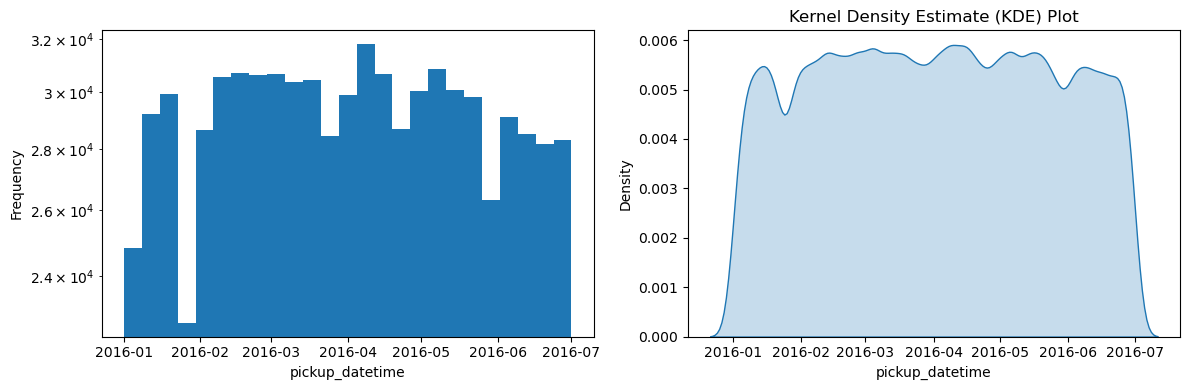

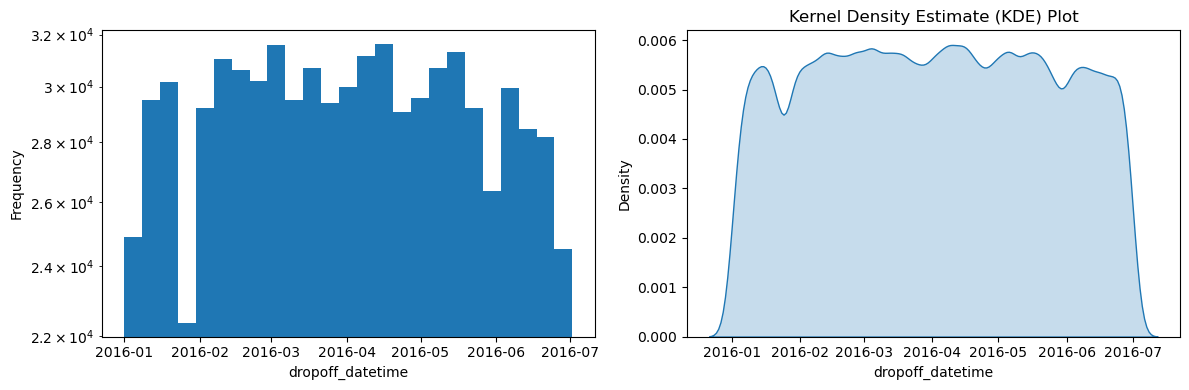

In [196]:
for var in dates_var:
    histogram_and_kde(var, 25, True)

Observation: No specific pattern for the pickup dates. Only that at the end of January there was a huge drop of taxi trips.

In [218]:
# Note that .mode() gives back a series. In the following histograms, for pickup_longitude for example, we have
# mode = 0 -74
# 0 here is the index. The mode is actually -74
type(df["pickup_longitude"].mode())

pandas.core.series.Series

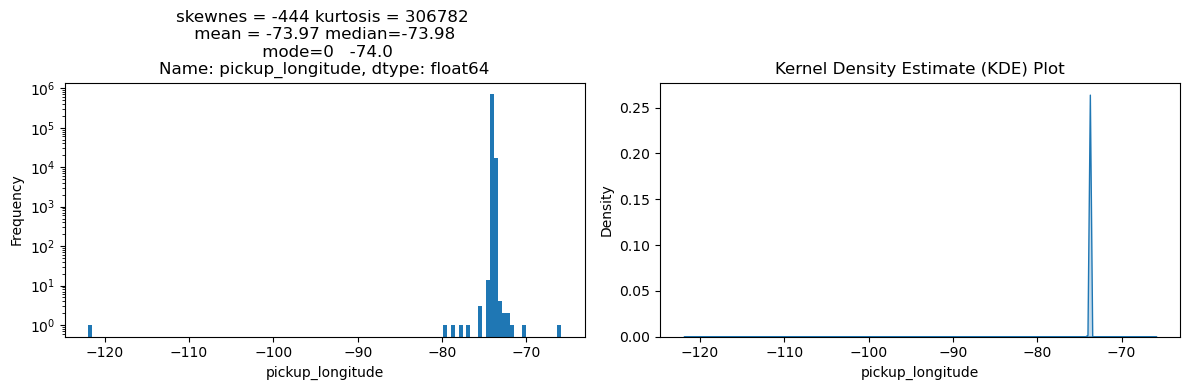

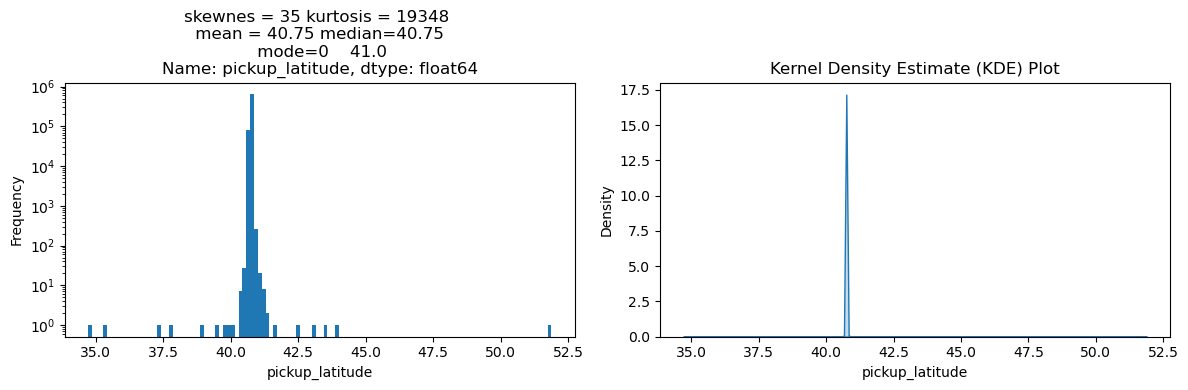

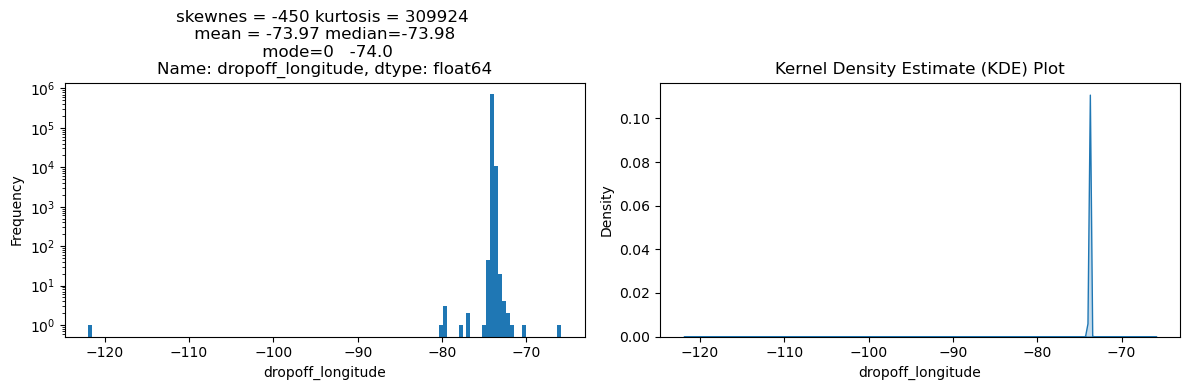

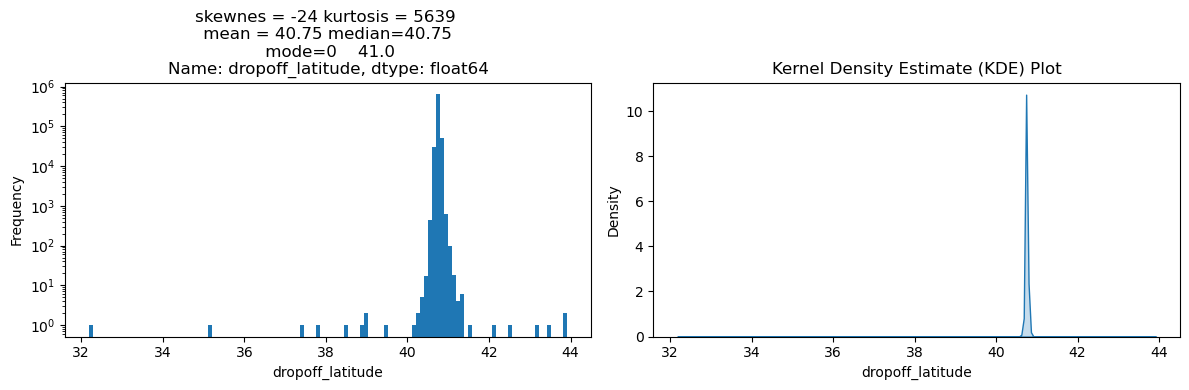

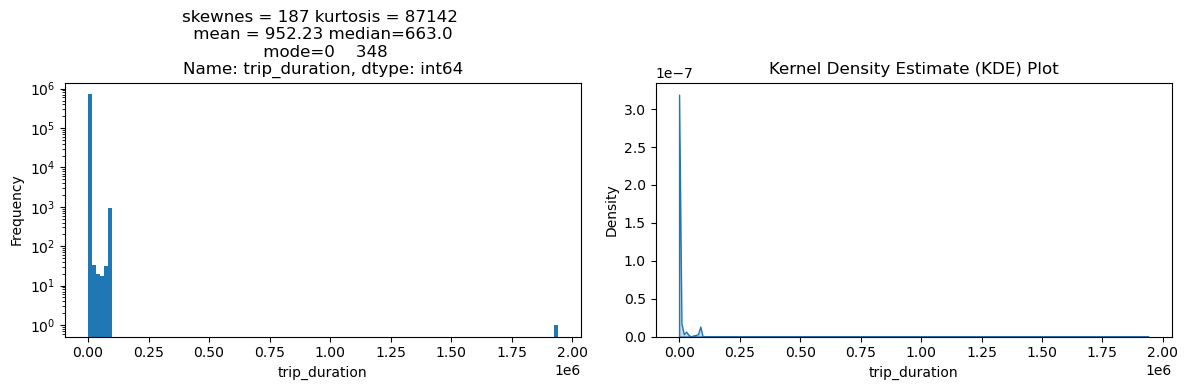

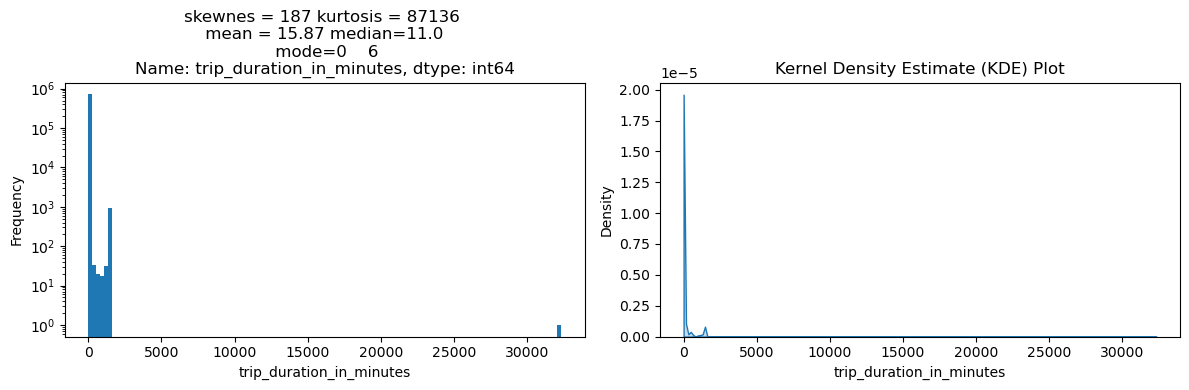

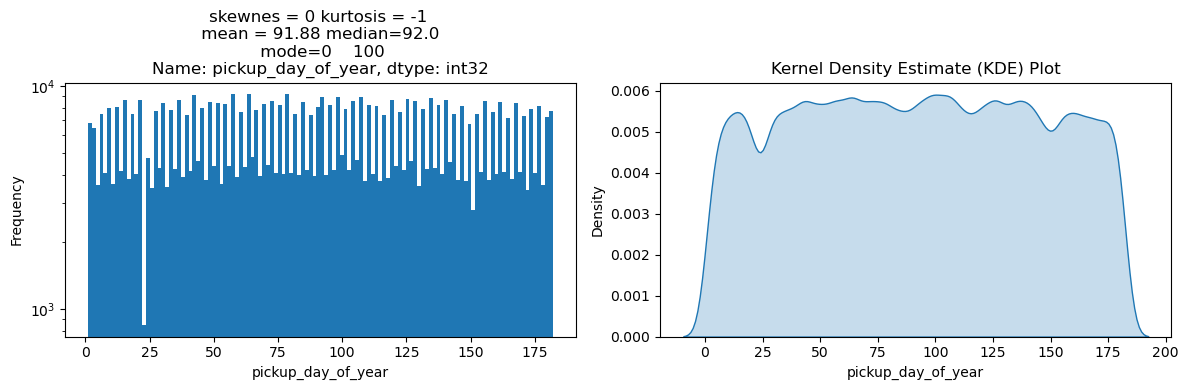

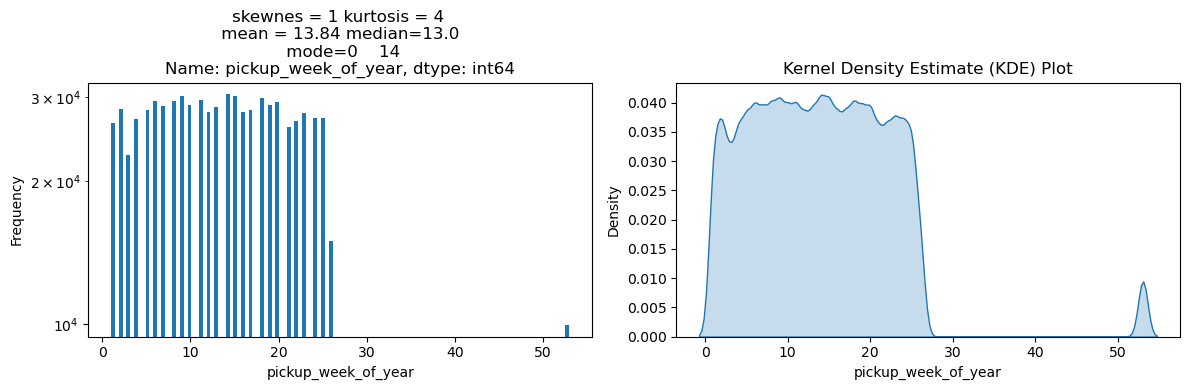

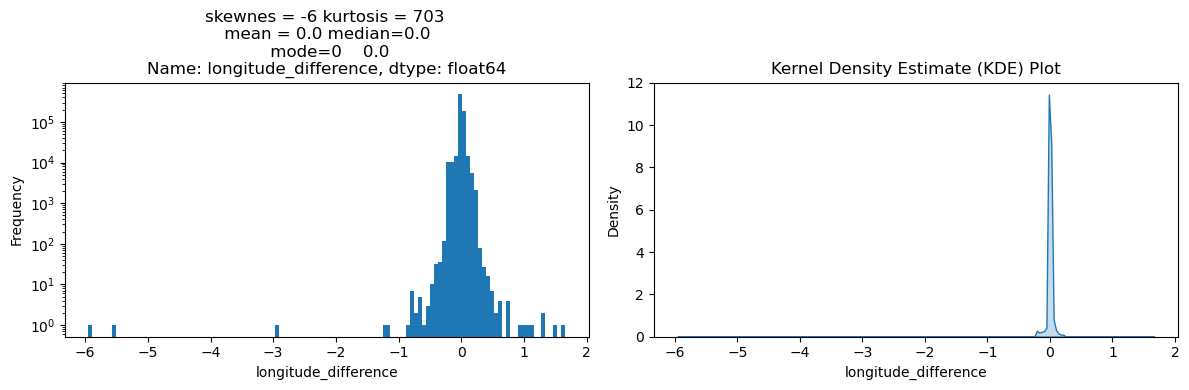

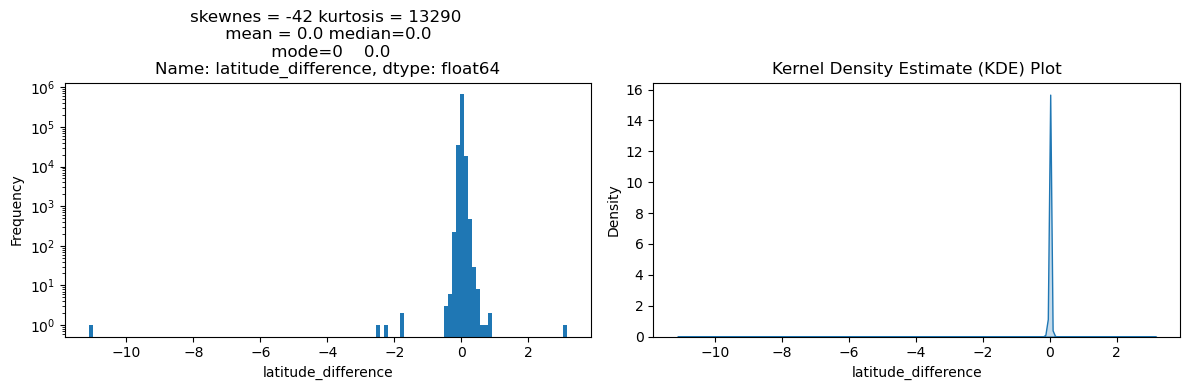

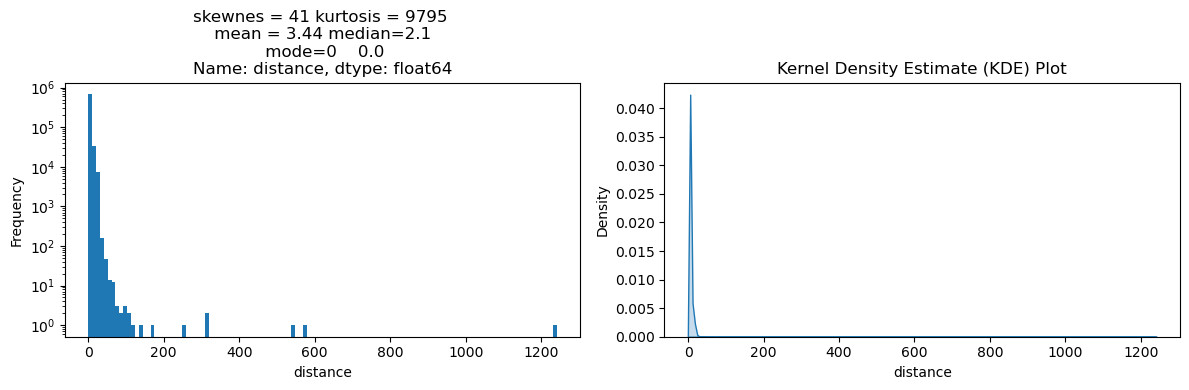

In [231]:
for var in numeric_var:
    histogram_and_kde(var, 120, True)

Observations: <br/>
For all continuous variables except for pickup_day_of_year and pickup_week_of_year:
kurtosis is high which indicates high presenece of extreme values. Those extreme values cause skewness.

We had to make the scale on the y-axis logarithm to make the histograms clear.

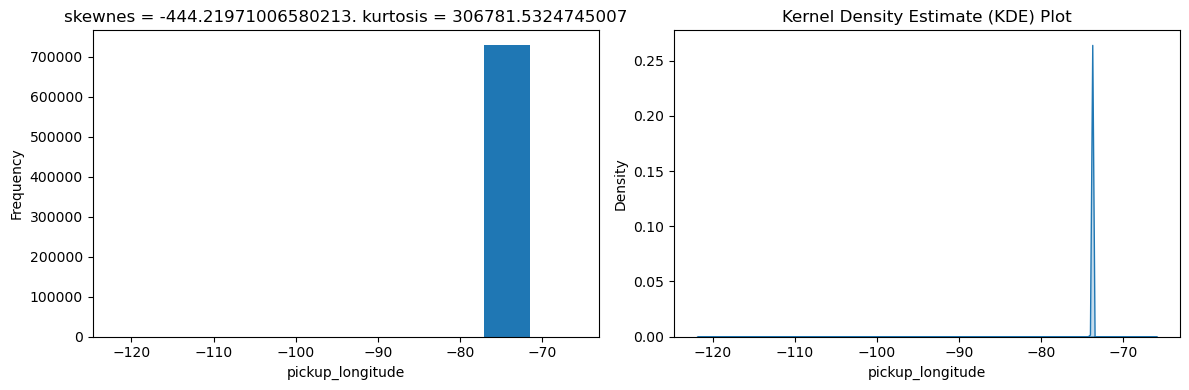

In [60]:
# Without the logarithmic scale, we get unclear histograms like this one
histogram_and_kde("pickup_longitude", 10, False)

# 3. Normality checks for continuous variables

In [232]:
def qq_plots(dataframe, var_list, num_fig_per_row = 3):
    
    num_vars = len(var_list)
    num_rows = math.ceil(num_vars / num_fig_per_row)
    
    fig, axes = plt.subplots(num_rows, num_fig_per_row, figsize=(num_fig_per_row * 5, num_rows * 5))
    fig.subplots_adjust(wspace=0.4, hspace= 0.4)
    
    axes = axes.flatten()

    for i, var in enumerate(var_list):
        ax = axes[i]
        stats.probplot(dataframe[var], plot=ax)
        ax.set_title(f'{var}')
          
    # Remove empty subplots (if any)
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.show()
# sm.qqplot(df["pickup_day_of_year"], line='s')     

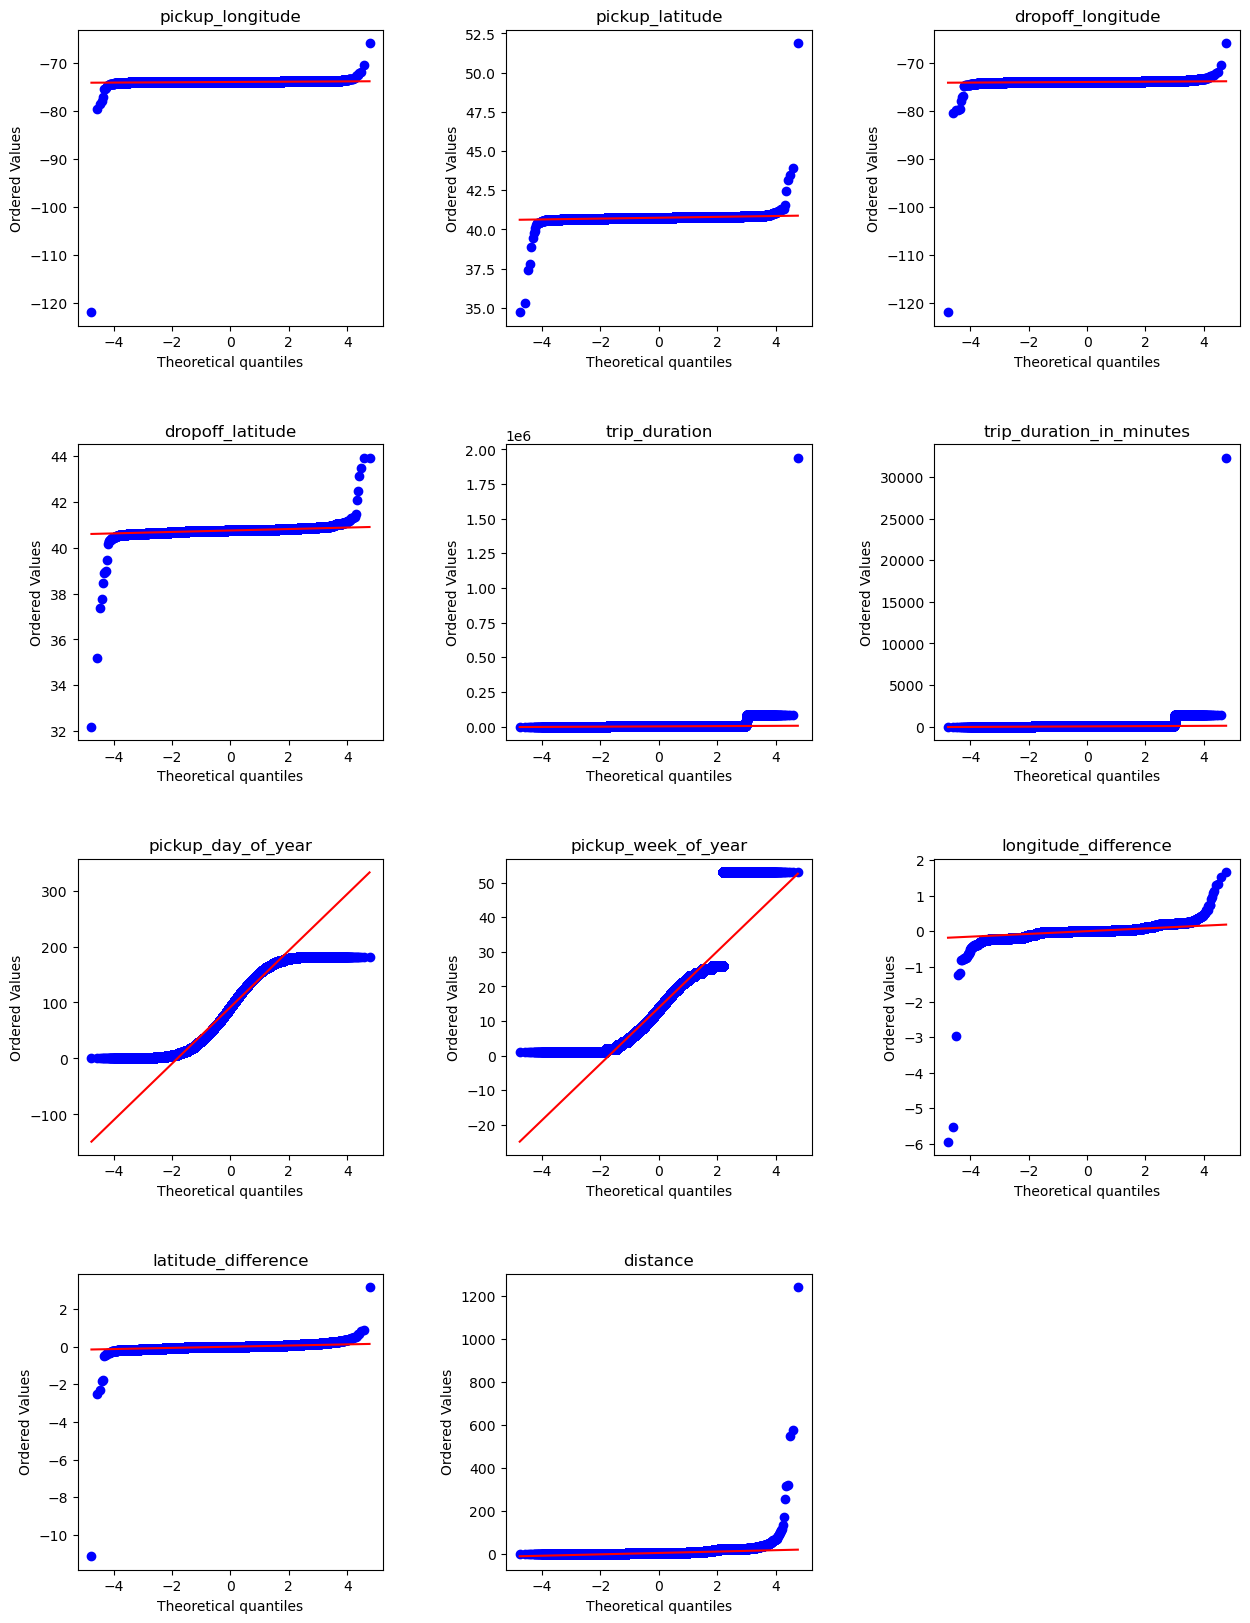

In [233]:
qq_plots(df, numeric_var)

The extreme values are making it difficult to clearly visualize the histograms, kde plots, and qq plots. 

# 4. Boxplots and outliers

In [221]:
def boxplots(dataframe, var_list, num_fig_per_row = 3):
    
    num_vars = len(var_list)
    num_rows = math.ceil(num_vars / num_fig_per_row)
    
    fig, axes = plt.subplots(num_rows, num_fig_per_row, figsize=(num_fig_per_row * 5, num_rows * 5))
    fig.subplots_adjust(wspace=0.4, hspace= 0.4)
    
    axes = axes.flatten()

    for i, var in enumerate(var_list):
        ax = axes[i]
        sns.boxplot(df[var], ax=ax)
        ax.set_title(f'{var}')
          
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.show()     

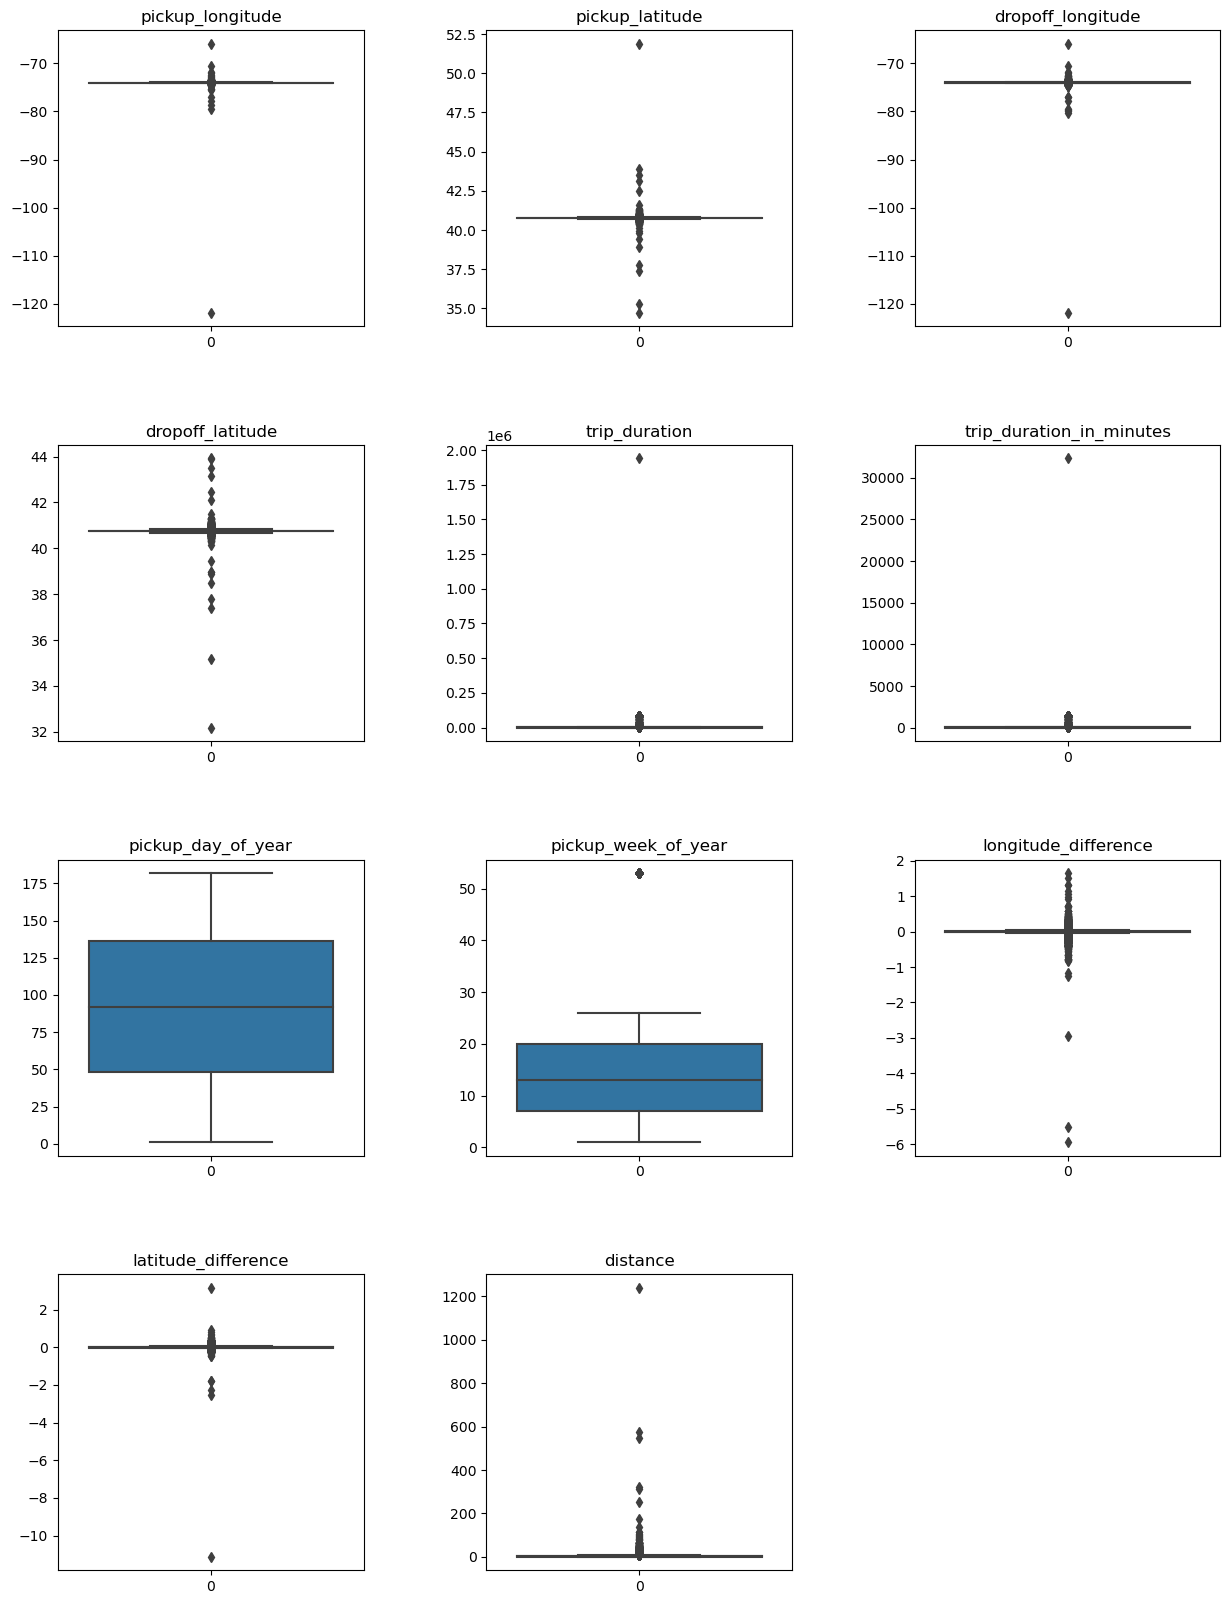

In [234]:
boxplots(df,numeric_var)

# 5. Exploring continuous variables again after removing the outliers

In [235]:
numeric_var

['pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'trip_duration',
 'trip_duration_in_minutes',
 'pickup_day_of_year',
 'pickup_week_of_year',
 'longitude_difference',
 'latitude_difference',
 'distance']

Explaining what I do in this section: <br/>
I won't remove the outliers from the dataframe. Rather, I will create a dictionary whose keys are the numerical columns' names and whose values are the corresponding values from the dataframe after removing the outliers.

In [251]:
dict_without_outliers ={}

In [249]:
def remove_outliers(df, var):

    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[var] >= lower_bound) & (df[var] <= upper_bound)][var].values
# this function return an array!

In [252]:
for var in numeric_var:
    dict_without_outliers[var] = remove_outliers(df,var)

Let us check how many trips we end up with after removing outliers from each column:

In [257]:
df.shape[0]

729322

In [258]:
for var in numeric_var:
    print(var, len(dict_without_outliers[var]))

pickup_longitude 687111
pickup_latitude 702943
dropoff_longitude 690328
dropoff_latitude 693076
trip_duration 692359
trip_duration_in_minutes 691249
pickup_day_of_year 729322
pickup_week_of_year 719348
longitude_difference 658687
latitude_difference 672683
distance 659004


**Boxplots without outliers:**

In [265]:
def boxplots_from_data_dictionary(data_dict, num_fig_per_row=3):

    num_vars = len(data_dict)
    num_rows = math.ceil(num_vars / num_fig_per_row)

    fig, axes = plt.subplots(nrows= num_rows, ncols=num_fig_per_row, figsize=(15, 10))
    fig.subplots_adjust(wspace=0.4, hspace= 0.4)
    
    axes = axes.flatten()

    for i, var in enumerate(dict_without_outliers.keys()):
        ax = axes[i]
        sns.boxplot(data_dict[var], ax=ax)
        ax.set_title(f'{var}')
          
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.show() 

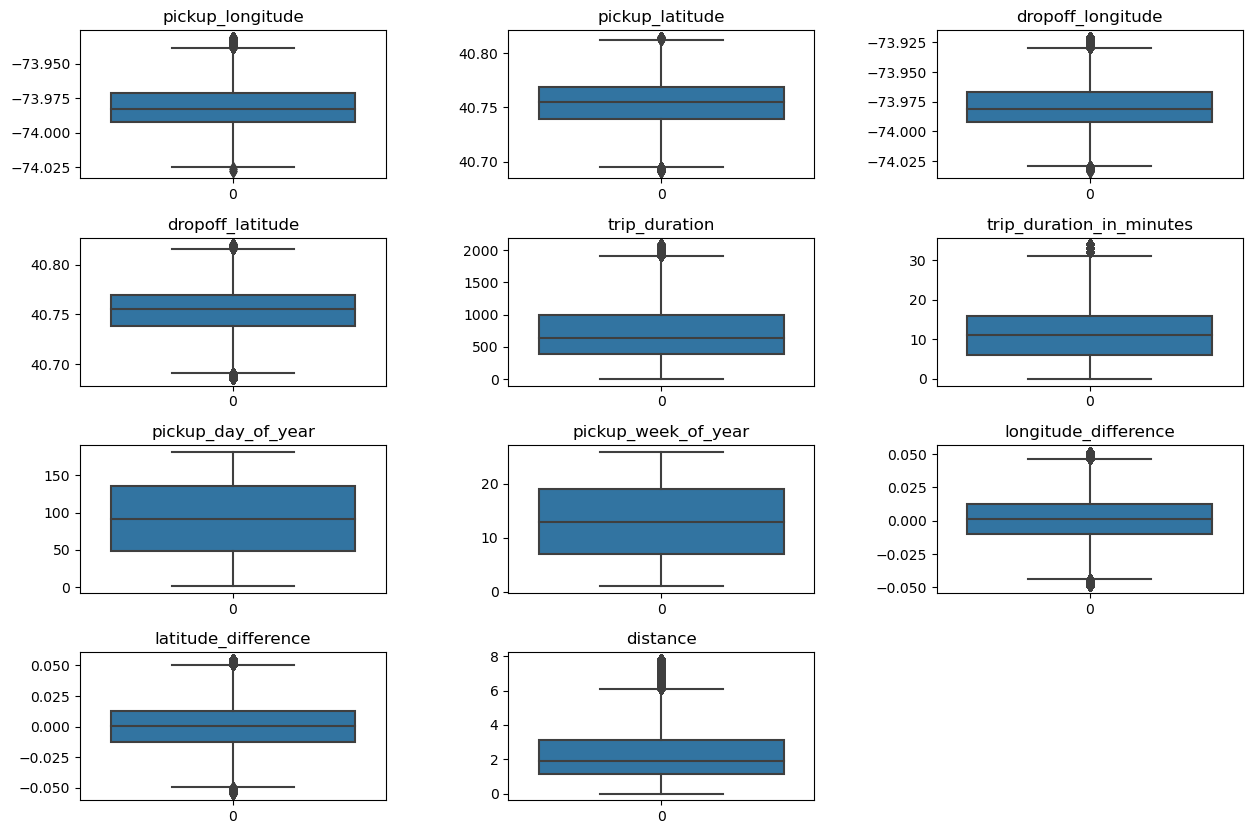

In [266]:
boxplots_from_data_dictionary(dict_without_outliers)